In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('precision', 2)

df1 = pd.read_csv("Seasons_Stats.csv")
df1.info()
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [3]:
df1.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.37,NaN,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.28,NaN,NaN,NaN,144.0,516.0,0.28,0.28,170.0,241.0,0.70,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.43,NaN,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.37,NaN,NaN,NaN,102.0,274.0,0.37,0.37,75.0,106.0,0.71,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.39,NaN,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.35,NaN,NaN,NaN,174.0,499.0,0.35,0.35,90.0,129.0,0.70,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.31,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.26,NaN,NaN,NaN,22.0,86.0,0.26,0.26,19.0,34.0,0.56,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.31,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.26,NaN,NaN,NaN,21.0,82.0,0.26,0.26,17.0,31.0,0.55,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
df = df1.drop(['Unnamed: 0', 'Player', 'Pos', 'Tm','GS', 'MP', 'PER', '3PAr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 
              'BLK%', 'TOV%', 'blanl', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', '3P', '3PA', '3P%',
              'ORB%', 'DRB%', 'AST%', 'TRB%', 'STL%', 'BLK%', 'TOV%', 'USG%',
              'WS/48', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV'], axis=1)

df.fillna(0, inplace=True)
df.head(8)

,Year,Age,G,TS%,FTr,OWS,DWS,WS,FG,FGA,FG%,2P,2PA,2P%,eFG%,FT,FTA,FT%,AST,PF,PTS
0,1950.0,31.0,63.0,0.37,0.47,-0.1,3.6,3.5,144.0,516.0,0.28,144.0,516.0,0.28,0.28,170.0,241.0,0.70,176.0,217.0,458.0
1,1950.0,29.0,49.0,0.43,0.39,1.6,0.6,2.2,102.0,274.0,0.37,102.0,274.0,0.37,0.37,75.0,106.0,0.71,109.0,99.0,279.0
2,1950.0,25.0,67.0,0.39,0.26,0.9,2.8,3.6,174.0,499.0,0.35,174.0,499.0,0.35,0.35,90.0,129.0,0.70,140.0,192.0,438.0
3,1950.0,24.0,15.0,0.31,0.40,-0.5,-0.1,-0.6,22.0,86.0,0.26,22.0,86.0,0.26,0.26,19.0,34.0,0.56,20.0,29.0,63.0
4,1950.0,24.0,13.0,0.31,0.38,-0.5,-0.1,-0.6,21.0,82.0,0.26,21.0,82.0,0.26,0.26,17.0,31.0,0.55,20.0,27.0,59.0
5,1950.0,24.0,2.0,0.38,0.75,0.0,0.0,0.0,1.0,4.0,0.25,1.0,4.0,0.25,0.25,2.0,3.0,0.67,0.0,2.0,4.0
6,1950.0,22.0,60.0,0.42,0.30,3.6,1.2,4.8,340.0,936.0,0.36,340.0,936.0,0.36,0.36,215.0,282.0,0.76,233.0,132.0,895.0
7,1950.0,23.0,3.0,0.28,0.31,-0.1,0.0,-0.1,5.0,16.0,0.31,5.0,16.0,0.31,0.31,0.0,5.0,0.00,2.0,6.0,10.0


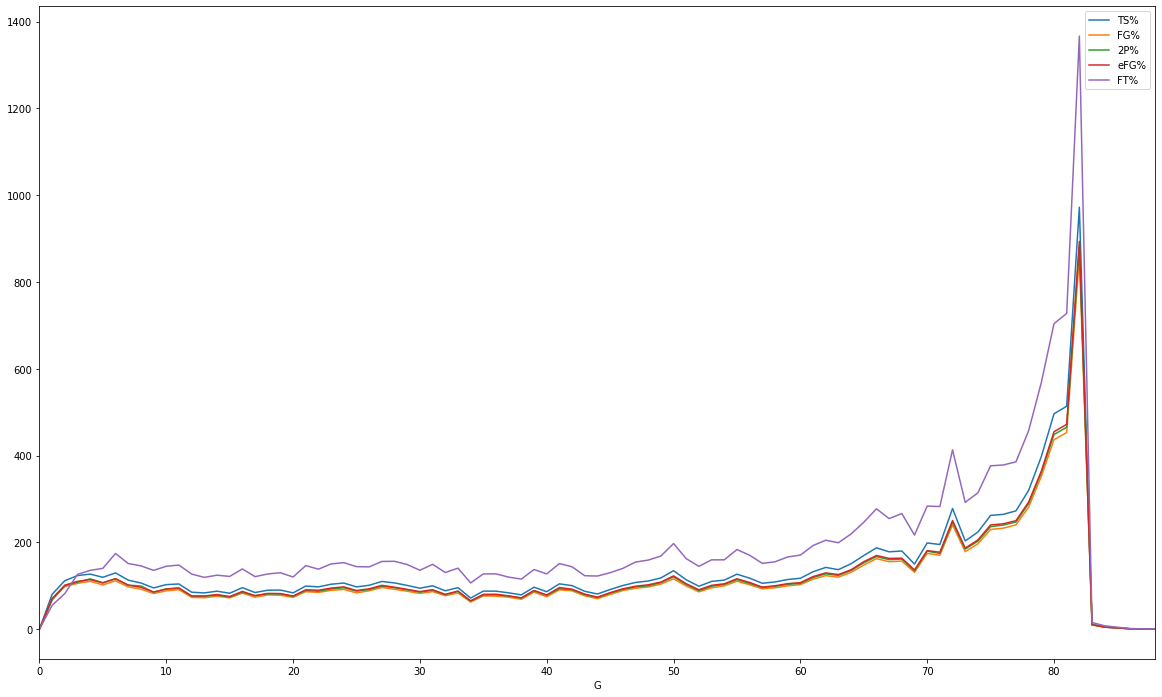

In [5]:
df[[x for x in df.columns if '%' in x] + 
   ['G']].groupby('G').sum().plot(figsize=(20,12));

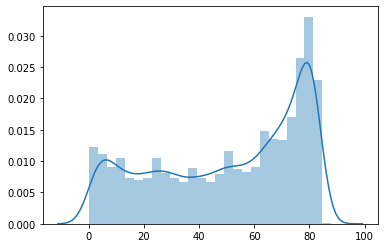

In [6]:
#sns.distplot(tips['total_bill']);
sns.distplot([df['G']]);


Всі відсоткові  характерисстики TS%, FG%, 2P%, eFG%, FT% (True Shooting %, Field Goal Percentage, Point Field Goal Percentage, Effective Field Goal Percentag) мають однаковий харакер (лінійно залежні), отже, на них можна не звертати увагу і залишити з усіх тільки 1 - True Shooting %.

In [7]:
d = df.drop(['FG%', '2P%', 'eFG%', 'FT%'], axis=1)
d.head()

,Year,Age,G,TS%,FTr,OWS,DWS,WS,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS
0,1950.0,31.0,63.0,0.37,0.47,-0.1,3.6,3.5,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0
1,1950.0,29.0,49.0,0.43,0.39,1.6,0.6,2.2,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0
2,1950.0,25.0,67.0,0.39,0.26,0.9,2.8,3.6,174.0,499.0,174.0,499.0,90.0,129.0,140.0,192.0,438.0
3,1950.0,24.0,15.0,0.31,0.40,-0.5,-0.1,-0.6,22.0,86.0,22.0,86.0,19.0,34.0,20.0,29.0,63.0
4,1950.0,24.0,13.0,0.31,0.38,-0.5,-0.1,-0.6,21.0,82.0,21.0,82.0,17.0,31.0,20.0,27.0,59.0


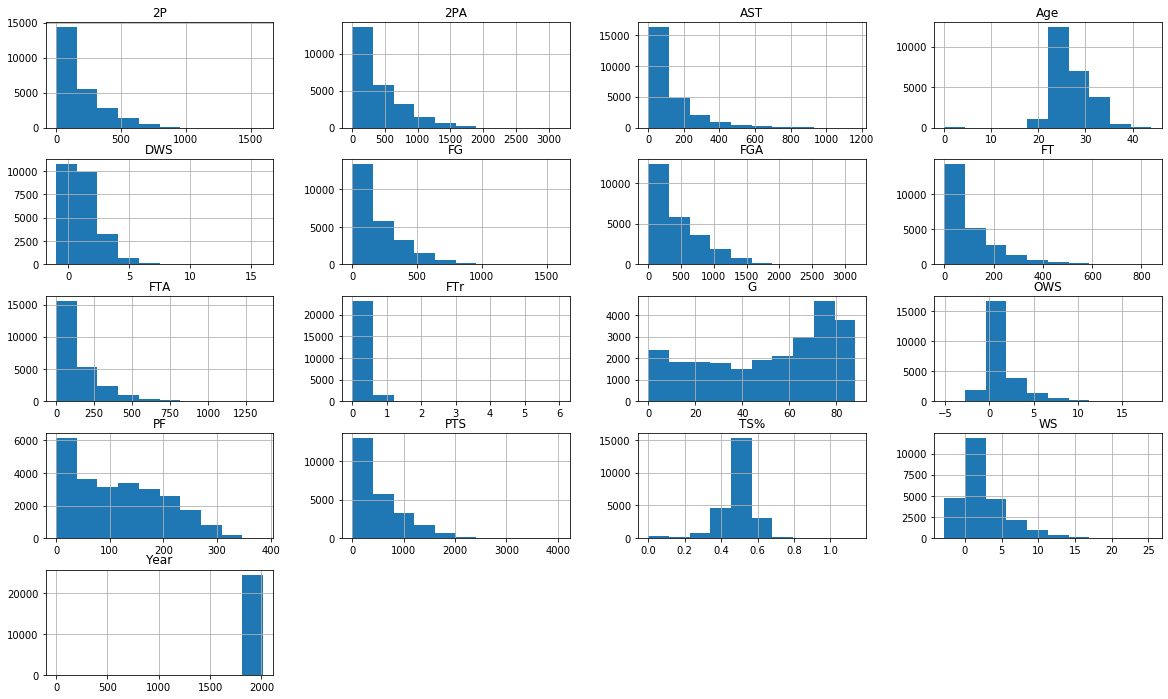

In [41]:
#гистаграма
d.hist(figsize=(20,12));


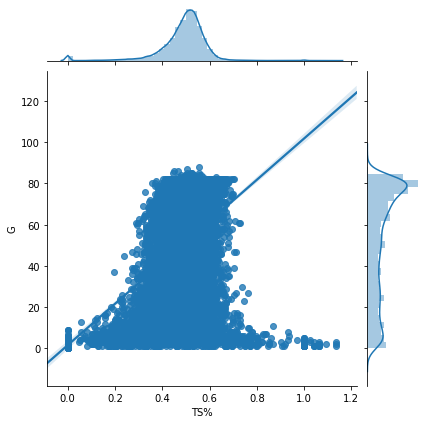

In [14]:
sns.jointplot(x='TS%', y='G', data=d, kind='reg');
#kind = (“scatter” or “reg” or “resid" or “kde” or “hex”)

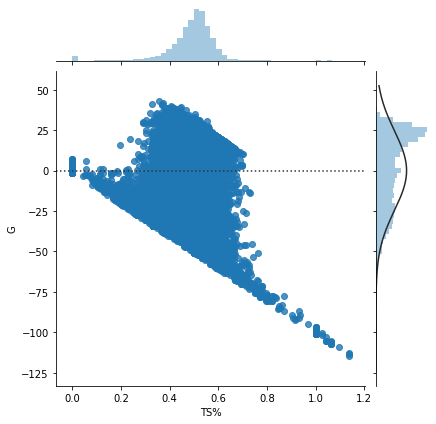

In [15]:
sns.jointplot(x='TS%', y='G', data=d, kind='resid');

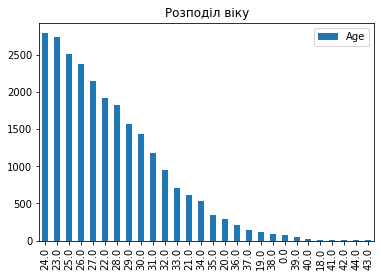

In [21]:
df['Age'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Розподіл віку');
#Графік показує розподіл віку Age баскетболістів до кількості чоловік в кого він зустрічається у порядку спаддання: самий розповсюджений вік - 24, самий унікальний - 43.

,Year,Age,G,TS%,FTr,OWS,DWS,WS,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS
0,1950.0,31.0,63.0,0.37,0.47,-0.1,3.6,3.5,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0
1,1950.0,29.0,49.0,0.43,0.39,1.6,0.6,2.2,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0
2,1950.0,25.0,67.0,0.39,0.26,0.9,2.8,3.6,174.0,499.0,174.0,499.0,90.0,129.0,140.0,192.0,438.0
3,1950.0,24.0,15.0,0.31,0.40,-0.5,-0.1,-0.6,22.0,86.0,22.0,86.0,19.0,34.0,20.0,29.0,63.0
4,1950.0,24.0,13.0,0.31,0.38,-0.5,-0.1,-0.6,21.0,82.0,21.0,82.0,17.0,31.0,20.0,27.0,59.0
5,1950.0,24.0,2.0,0.38,0.75,0.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0,3.0,0.0,2.0,4.0
6,1950.0,22.0,60.0,0.42,0.30,3.6,1.2,4.8,340.0,936.0,340.0,936.0,215.0,282.0,233.0,132.0,895.0
7,1950.0,23.0,3.0,0.28,0.31,-0.1,0.0,-0.1,5.0,16.0,5.0,16.0,0.0,5.0,2.0,6.0,10.0
8,1950.0,28.0,65.0,0.35,0.40,-2.2,5.0,2.8,226.0,813.0,226.0,813.0,209.0,321.0,163.0,273.0,661.0
9,1950.0,28.0,36.0,0.36,0.48,-0.7,2.2,1.5,125.0,435.0,125.0,435.0,132.0,209.0,75.0,140.0,382.0


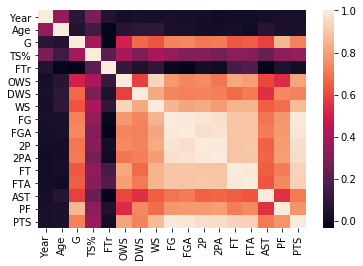

In [59]:
sns.heatmap(d.corr());
#кореляція кількісних ознак по розфарбованій матриці кореляцій: можна викинути FGA, 2P, 2PA, (залишити FT); FTA; PTS.
d

In [22]:
d = d.drop(['FGA', '2P', '2PA', 'FTA', 'PTS'], axis=1)

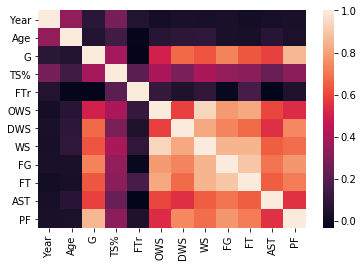

In [23]:
sns.heatmap(d.corr());

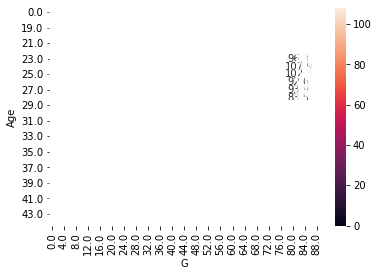

In [25]:
platform_genre_sales = d.pivot_table(
                        index='Age', 
                        columns='G', 
                        values='TS%', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=10);

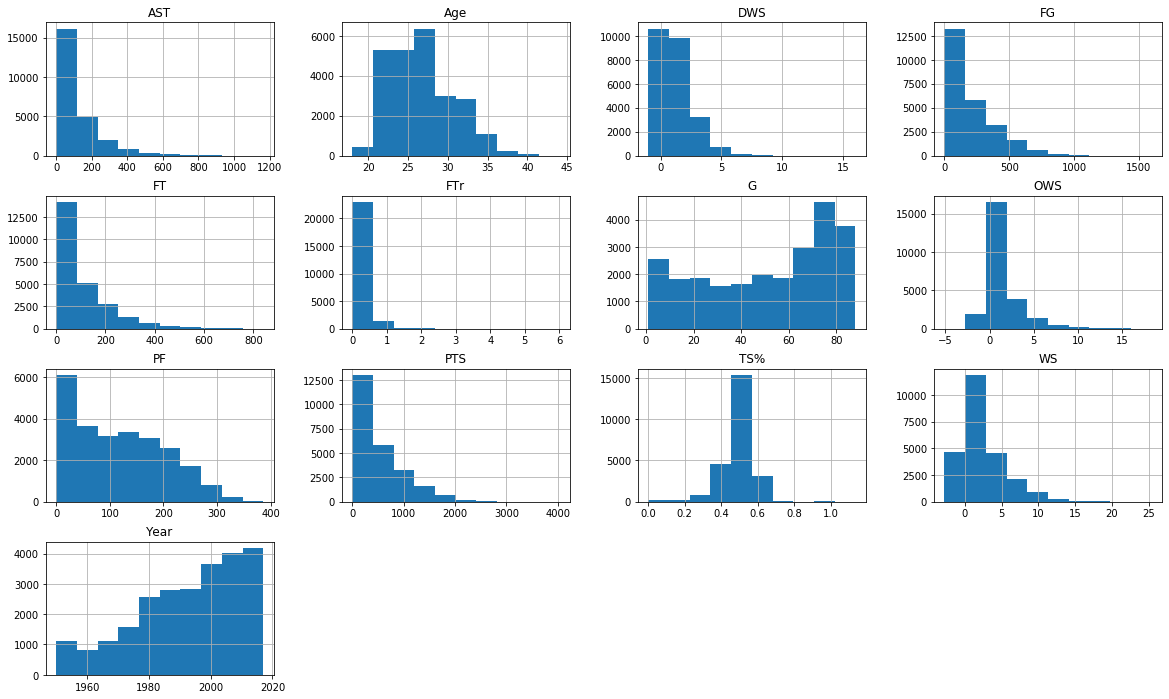

In [14]:
#гистаграма
d.hist(figsize=(20,12));


 Бачимо, що Age розподіленo нормально. Винятки - FTr. Також зміщенi AST, FT, DWS, FG, PTS, WS .

In [42]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [43]:
# преобразуем все признаки в числовые, выкинув штаты
scaler = StandardScaler()
d_scaled = scaler.fit_transform(d)
d = d.replace(np.nan, 0)

In [44]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(d_scaled)

Wall time: 14min 27s


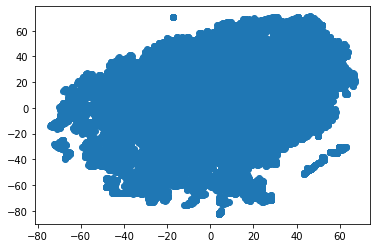

In [45]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [ ]:
дивлячись на даний графік можна виділити 4 групи?